In [4]:
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

In [5]:
file_path = 'data/Data Sensus 2022.xlsx' 
data = pd.read_excel(file_path, sheet_name=0)
data.head()

,Provinsi,Laki-laki,Perempuan,Population,Kematian
0,ACEH,2715386,2692469,5407855,1282832
1,SUMATERA UTARA,7584993,7530213,15115206,3527273
2,SUMATERA BARAT,2841802,2798827,5640629,1337791
3,RIAU,3383451,3230933,6614384,1586498
4,JAMBI,1849269,1781867,3631136,903600


### Data Quality

In [6]:
# Summary Statistik
print(data.describe())

          Laki-laki     Perempuan    Population      Kematian
count  3.400000e+01  3.400000e+01  3.400000e+01  3.400000e+01
mean   4.099674e+06  4.011319e+06  8.110993e+06  2.077322e+06
std    5.779780e+06  5.706193e+06  1.148536e+07  3.099570e+06
min    3.833820e+05  3.443730e+05  7.277550e+05  1.640820e+05
25%    1.173954e+06  1.125797e+06  2.299751e+06  5.827375e+05
50%    2.167756e+06  2.067937e+06  4.298572e+06  1.125927e+06
75%    4.154572e+06  3.991780e+06  8.146352e+06  1.974685e+06
max    2.506723e+07  2.433858e+07  4.940581e+07  1.311341e+07


[[<Axes: title={'center': 'Laki-laki'}>
  <Axes: title={'center': 'Perempuan'}>]
 [<Axes: title={'center': 'Population'}>
  <Axes: title={'center': 'Kematian'}>]]


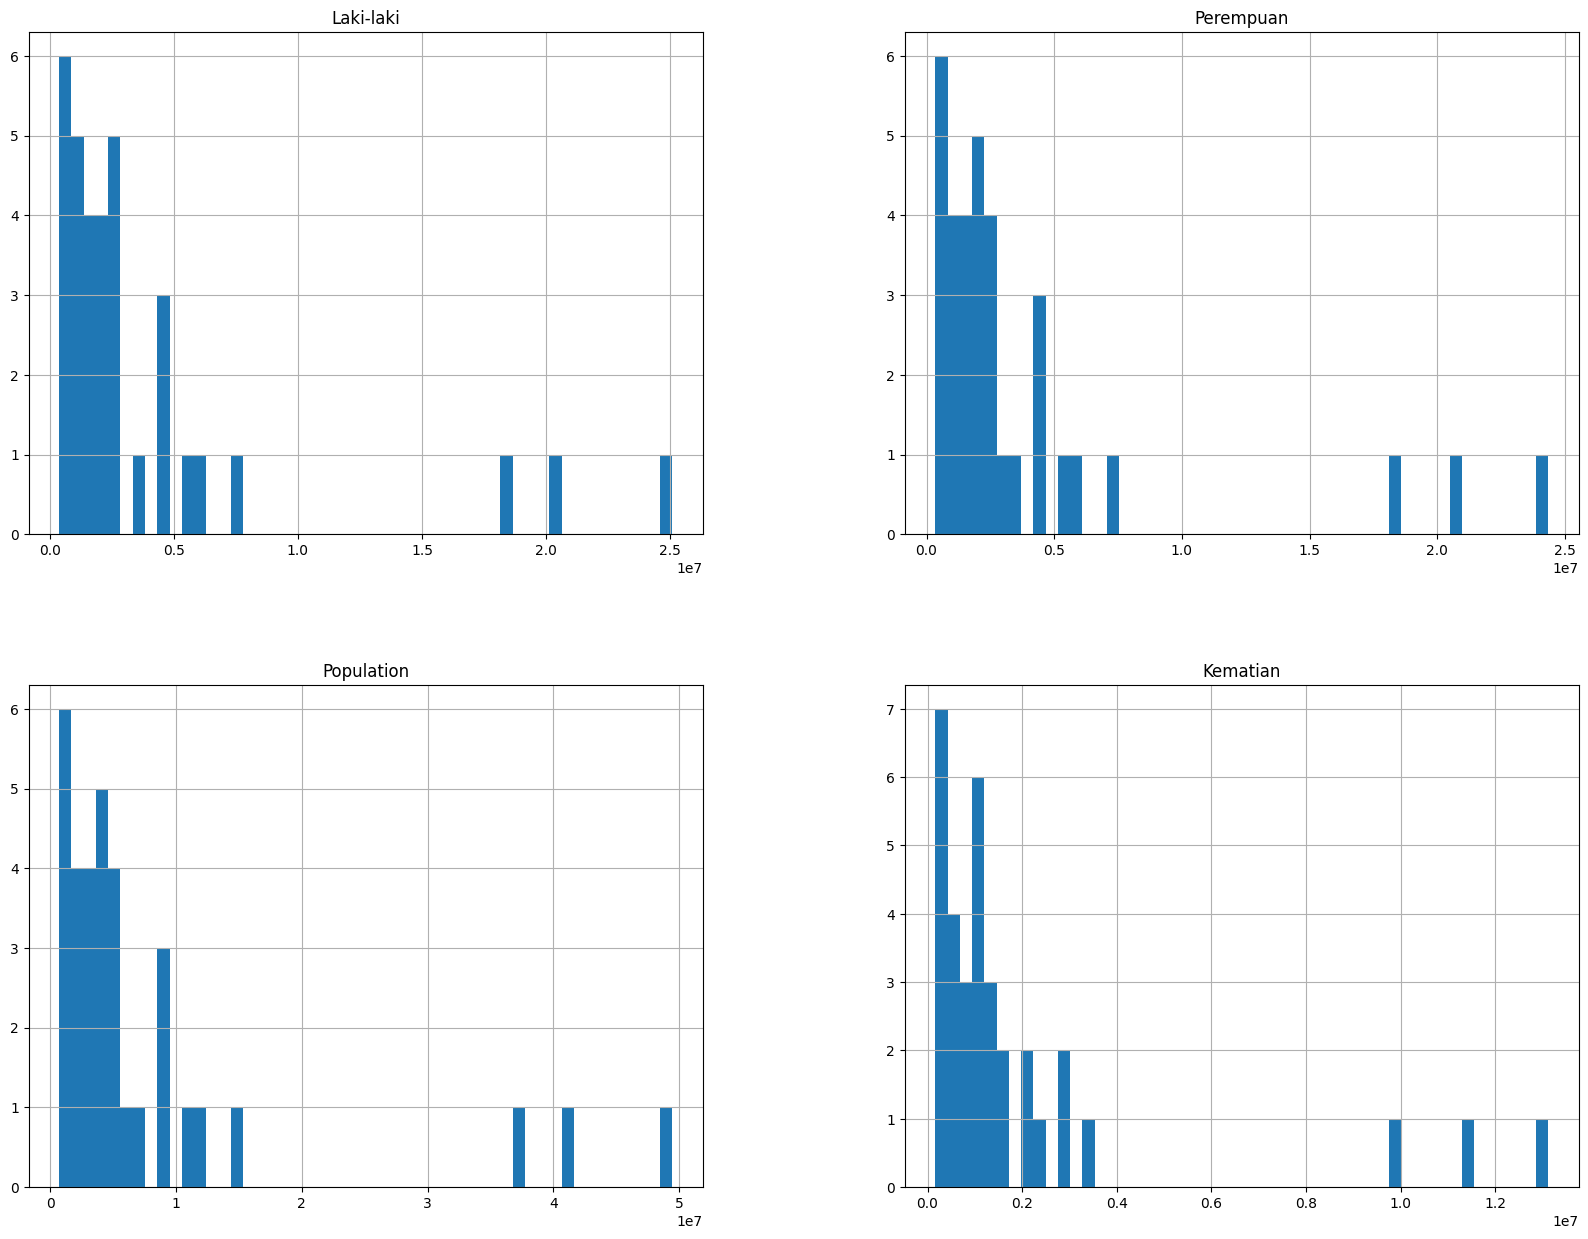

In [7]:
# Analisis Distribusi kolom
print(data.hist(bins=50, figsize=(20,15)))

In [8]:
# Checking Missing values
print(data.isnull().sum())

Provinsi      0
Laki-laki     0
Perempuan     0
Population    0
Kematian      0
dtype: int64


In [9]:
# Unique values
print(data.nunique())

Provinsi      34
Laki-laki     34
Perempuan     34
Population    34
Kematian      34
dtype: int64


### Data Cleaning

In [10]:
# Handling missing values
data = data.dropna()

In [11]:
# Removing duplicates
data = data.drop_duplicates()

In [12]:
data['Nama Provinsi'] = data['Nama Provinsi'].str.lower()
data.head()

KeyError: 'Nama Provinsi'

### Data Validation

In [ ]:
def validate_data(data):
    issues = []

    # Check jika data kolom tidak sesuai
    required_columns = ['ID', 'Nama Provinsi', 'Laki-laki', 'Perempuan', 'Population', 'Kematian']
    for col in required_columns:
        if col not in data.columns:
            issues.append(f"Missing required column: {col}")

    if issues:
        return issues

    # Chek Rentang nilai yang sesuai
    if not data['Population'].between(0, 1000000, inclusive="both").all():
        issues.append("Nilai kolom 'Populasi' di luar jangkauan")
        
    if not data['Kematian'].between(0, 100000, inclusive="both").all():
        issues.append("Nilai kolom 'Kematian' di luar jangkauan")
        
    #  # Chek Format
    # if not data['email_column'].str.contains('@').all():
    #     issues.append("Invalid email addresses in 'email_column'")

    # # Chek konsistensi tanggal
    # if not (data['start_date'] <= data['end_date']).all():
    #     issues.append("Start date is after end date")

    return issues

validation_issues = validate_data(data)
if validation_issues:
    for issue in validation_issues:
        print(f"Isu Hasil Validasi: {issue}")
else:
    print("Semua Validasi Terverifikasi")

NameError: name 'data' is not defined